# Visualising RF Spectrum

[Electromagnetic (EM) waves](https://en.wikipedia.org/wiki/Electromagnetic_radiation) propogate through free space. We perceive some of these waves as visible light and some others as heat. Just as with any other wave, EM waves are characterised mainly by their frequency. EM waves with frequency approximately between 430 THz and 770 THz are visible to the human eye. Typically, EM waves with much lower frequencies (larger wavelengths) are used for communication. Due to diffraction, EM waves can bend around obstacles whose dimensions are comparable to its wavelength. EM waves with frequencies ranging from a few kHz to a multiple 10s of GHz are used widely for communication. These are commonly referred to as radio waves.

Tools that help visualise the radio frequency (RF) spectrum play an important role in understanding the nature of these radio waves and in manipulating them. Generated radio waves may occupy a spectrum of frequencies centered around a particular carrier wave. For example, transmissions from an Airtel 4G (LTE) tower occupies 20 MHz centered around 2.340 GHz. For such a transmission 20 MHz signifies the **bandwidth** and 2.340 GHz is the **center frequency**.

<img src="lte_photo.png" /> 

The above figure is presented to provide some intuition into the composition of a 4G RF transmission. The transmitter generates EM wave components with frequency between 2.330 GHz and 2.350 GHz and therefore they have appreciable amplitude. Components outside this frequency range are not generated. It is worth noting here that as with any physical system, there is some noise in radio frequencies as well. This noise has many sources and detailed discussion is out of the scope of this post. As far as we are concerned, there is a hard lower limit to the amplitude (or power) of signals that we can detect. This limit is called the "noise floor" and signals with power below the noise floor are not directly detectable unless some complex processing is performed (Imagine calling out to your friend during Saarang EDM Night :P). Further, the signals beyond 2.350 GHz are ones from other 4G towers operated by various companies. In this post, we'll go through the following:

1. Spectral Density (and how to interpret it)
2. Using Discrete Fourier Transforms to analyse spectral density
3. Short Term Fourier Transforms (STFT) and Waterfall Plots (Spectrogram)
4. Examples with common signals

## Spectral Density

The reader might be aware that every time domain signal $x(t)$ has a corresponding frequency domain representation. Just as the signal $x(t)$ has different values for different instances in time, it's frequency domain counterpart could also be different for each frequency component. The spectral density describes the distribution of energy or power across the frequency domain representation of $x(t)$.

### Energy Spectral Density

For signals which have finite energy, especially those that are transient or have pulse-like characteristics, it is useful to look at how their energy is distributed over frequency. The energy $E$ of a signal may be written as
$$
E=\int _{ -\infty  }^{ \infty  }{ { \left| x(t) \right|  }^{ 2 }dt } 
$$
<!--- TODO: Parseval's Theorem Post -->
From Parseval's Theorem, we have an alternate expression for $E$.
$$
\int _{ -\infty  }^{ \infty  }{ { \left| x(t) \right|  }^{ 2 }dt } =\int _{ -\infty  }^{ \infty  }{ { \left| X(f) \right|  }^{ 2 }df } 
$$

Where $X(f)$ is the Fourier Transform of the time domain signal and $f$ is the frequency in Hz. The integral on the RHS is equal to $E$ and ${ \left| X(f_0) \right|  }^{ 2 }$ may be thought of as a density function of energy per unit frequency at frequency $f_0$.

Therefore, the energy spectral density $E_u(f)$ of signal $x(t)$ is defined as:
$$
{ E }_{ u }(f) = { \left| X(f) \right|  }^{ 2 }
$$
Which is simply the square of the magnitude of the Fourier Transform.
<!--- TODO: Should we link to autocorrelation function? -->

### Power Spectral Density

The definition of $E_u$ in the previous subsection is not valid for continuous time signals which exist over all time and hence may have infinite energy. For such signals, we define _power spectral density_ (PSD). The PSD signifies how the power of a signal is distributed over frequency components. The power $P$ of $x(t)$ may be expressed as:
$$
P=\lim _{ T\rightarrow \infty  }{ \frac { 1 }{ T } \int _{ 0 }^{ T }{ { \left| x(t) \right|  }^{ 2 }dt }  } 
$$
One cannot obtain the Fourier transform of an infinite energy signal that exists over all time. One way to carry out the PSD measurement approximately is using the **periodogram method**. This method involves truncating $x(t)$ in time and then using the corresponding Fourier transform's average as an estimator for the PSD. Consider $x_{ T_{ 0 } }(t)$:
\begin{equation*}
x_{ T_{ 0 } }(t)= \left\{ \begin{matrix} 0, & \left| t \right| >\frac { T_{ 0 } }{ 2 }  \\ x(t), & \left| t \right| \le \frac { T_{ 0 } }{ 2 }  \end{matrix} \right\}
\end{equation*}

If $X_{ T_{ 0 } }(f)$ is the Fourier transform of the above truncated signal, then the energy spectral density is given by  ${ \left| X_{ T_{ 0 } }(f) \right|  }^{ 2 }$. Averaging over the interval of observation, we get an estimate for the PSD:
$$
\hat { S_{ x } } (f)=\frac { { \left| X_{ T_{ 0 } }(f) \right|  }^{ 2 } }{ T_{ 0 } } 
$$
This estimate is called a periodogram. The periodogram converges to the true PSD if the interval $T_0$ tends to infinity. The periodogram is commonly obtained by calculating the DFT of a sampled version of a time truncated and windowed signal. Care must be taken to ensure that the truncation interval $T_0$ is large enough to obtain the required frequency resolution and that the sampling rate is large enough to capture all variations in $x(t)$. As expected, the PSD estimate from a single periodogram is far from representative of a true PSD; therefore many periodograms over successive observation intervals are averaged to obtain smoother estimates.

### Concluding Note

Both the ESD and the PSD are representative of the frequency content of a given signal. In practice, ESD is commonly used to analyse a signal's frequency content. Once RF signals are downconverted and sampled, the most straightforward way to compute the ESD is to take a finite number of samples and perform DFT (using FFT) and then use the magnitude of the FFT to look at which frequencies are occupied. We'll go through some examples in the next section.

## DFT in Spectrum Visualisation

In real life, most communication systems (Digital) work by sampling continuous time signals and then processing them. Consider a discrete time sequence $x[n]$ sampled at a rate $F_s$ Hz from $x(t)$. The $N$ point Discrete Fourier Transform (DFT) of $x[n]$ gives the sampled version of the CTFT of the same length of $x(t)$ (assume that the signal is sufficienctly oversampled). <!--- TODO: Post on DFT etc? -->This means that the DFT can be used as a reliable substitute for the Fourier Transform of the signal, and the ESD can be directly calculated from the DFT.

An example is illustrated below:

Sampling Frequency is 1000.0 Hz
Signal Frequency is 250 Hz
DFT length n is 200


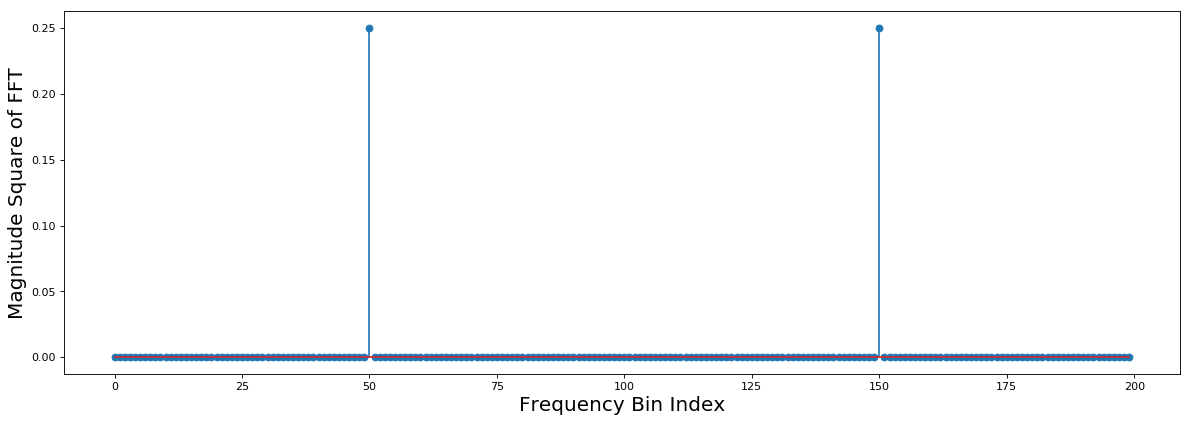

In [4]:
# The below is a command to force the ipynb to plot inline instead of popping a window
%matplotlib inline
# numerical python "numpy" library
import numpy as np
# plotting library
import matplotlib.pyplot as plt   
# signal processing library
from scipy import signal
# The reader is urged to look up the following functions:
# 1. numpy.fft.fft()
# 2. numpy.fft.fftshift()
# 3. matplotlib.pyplot.stem, matplotlib.pyplot.figure
# 4. scipy.signal

# Center frequency of sine signal
f_c = 250;
# Sampling interval in seconds
t_step = 0.001;
# Sampling Frequency (Hz)
f_s = 1/t_step;
# Sampling time vector 0 s - 0.2 s in steps of t_step
t = np.arange(0,0.2,t_step);
# Length of signal (for FFT normalisation)
n = len(t)
# Sine signal
x = np.cos(2*np.pi*f_c*t);
# Taking FFT, shifting it and scaling it by n
X = np.fft.fftshift(np.fft.fft(x))/n;

# Setting figure dimensions
fig = plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')

# Plotting figure
plt.stem(np.abs(X*X))

# Setting x and y axes labels
plt.xlabel('Frequency Bin Index')
plt.ylabel('Magnitude Square of FFT')
# Setting label fontsize
plt.rc('axes', labelsize=18)

# Printing some useful information
print("Sampling Frequency is",f_s,"Hz")
print("Signal Frequency is",f_c,"Hz")
print("DFT length n is",n)

# Show the plot
plt.show()

In the above example, the signal analysed is a real sinusoid of frequency ``f_c``. Note that the x-axis in the figure is the frequency bin index: index 0 corresponds to ``-f_s/2`` and index ``n`` corresponds to ``+f_s/2``. The frequency scales linearly across the indices from 0 to ``n``. From this point onwards, we'll replace frequency bins with the corresponding frequency itself. Note that the best frequency resolution possible with a DFT of length ``n`` is ``f_s/n``. As expected, we see two spikes in the spectrum at ``f_c`` and ``-f_c``. This is because our signal is a real sinusoid. Let's create a complex sinusoid with the same frequency and observe what happens.

Sampling Frequency is 1000.0 Hz
Signal Center Frequency is 250 Hz
DFT length n is 200


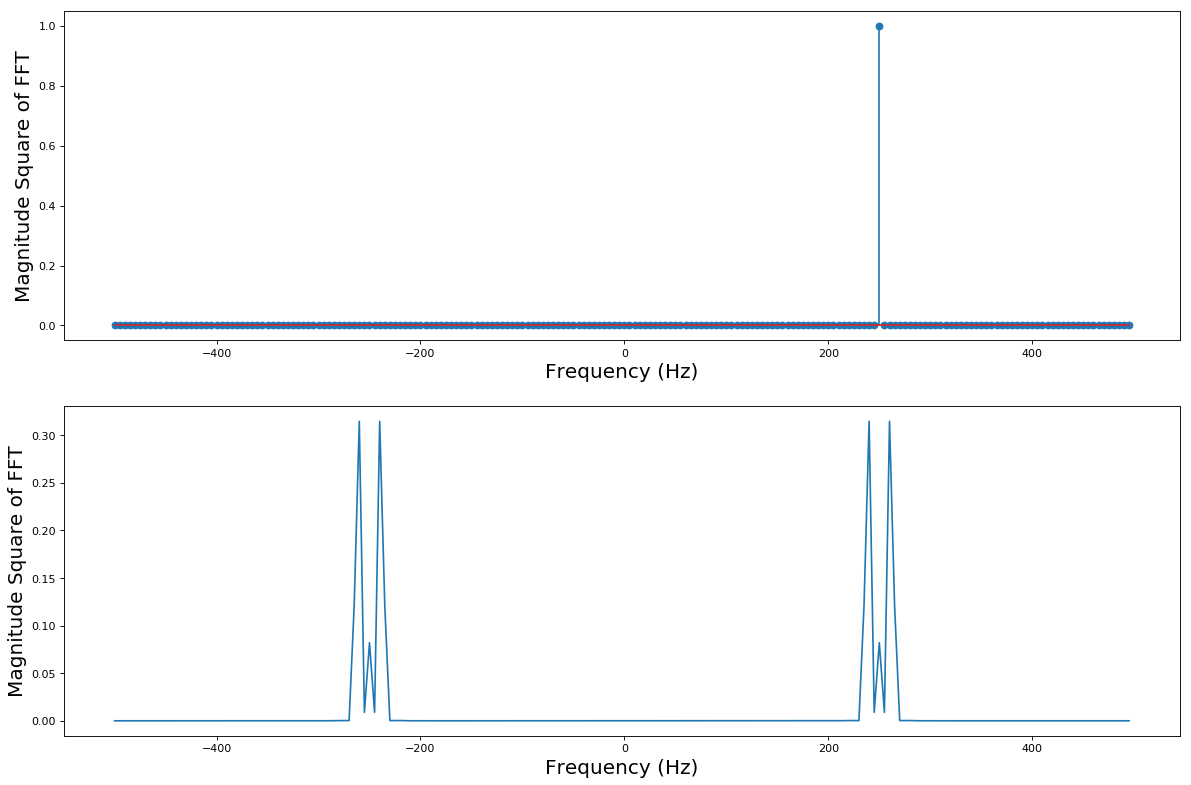

In [7]:
# Frequency vector according to bin indices
f_vec = np.arange(-f_s/2,f_s/2,f_s/n)

# Complex Sinusoid
x_2 = np.cos(2*np.pi*f_c*t)+1j*np.sin(2*np.pi*f_c*t);
# Taking FFT, shifting it and scaling it by n
X_2 = np.fft.fftshift(np.fft.fft(x_2))/n;  

# AM Modulation
# Modulated message
am_m = np.convolve(signal.hann(100),np.random.normal(0,1,200))
am_m = am_m[0:n]
# Real AM signal
x_3 = am_m*np.cos(2*np.pi*(f_c)*t);
# Taking FFT, shifting it and scaling it by n
X_3 = np.fft.fftshift(np.fft.fft(x_3))/n;  

# Setting figure dimensions
fig = plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')

# Plotting complex sinusoid subplot
plt.subplot(2,1,1)
plt.stem(f_vec,np.abs(X_2*np.conj(X_2)))

# Setting x and y axes labels
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Square of FFT')
# Setting label fontsize
plt.rc('axes', labelsize=18)

# Plotting FM signal subplot
plt.subplot(2,1,2)
plt.plot(f_vec,np.abs(X_3*np.conj(X_3)))

# Setting x and y axes labels
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Square of FFT')
# Setting label fontsize
plt.rc('axes', labelsize=18)

# Printing some useful information
print("Sampling Frequency is",f_s,"Hz")
print("Signal Center Frequency is",f_c,"Hz")
print("DFT length n is",n)

# Show the plot
plt.show()

In baseband RF signal processing, we usually have two streams of data: the I and Q components. These are processed as complex baseband signals. In the first plot in the example above, the I stream is ``cos(2*np.pi*f_c*t)`` and the Q stream is ``sin(2*np.pi*f_c*t)``. Now let's look at a signal with finite bandwidth. The second example shows an FM (frequency modulation) Waveform riding on a carrier cosine of frequency ``f_c``. It is clearly seen that a lot of frequency components around the center frequency ``f_c`` have energy. Here, the range of contiguous frequencies with non zero (almost) power indicate  the bandwidth. Also note that we have interpolated the frequency domain representation rather than plotting it as a discrete set of values.

## Short Term Fourier Transforms (STFT)

In real life, we cannot afford to perform DFT over a large number of samples since the FFT algorithm is complex and resource intensive. Therefore, for large records of data, the Short Term Fourier Transform (STFT) is a good way to visualise spectrum activity. Say we have a data record of $25\times10^8$ samples (100 seconds) at $25$ MSps. One way to perform STFT on this record would be to take small contiguous blocks each of size N(say = 1024) and then take the DFT of each block. Each block's DFT is now approximately representative of the spectrum activity at time equal to the time at which the block begins. Therefore, we generate a large number of DFT outputs, which when stacked one after another show how the spectrum activity changes across time. Instead of taking contiguous blocks, each block can be windowed and/or overlapped with its successors and predecessors. 

Sampling Frequency is 1000.0 Hz
STFT block length n_fft is 1024


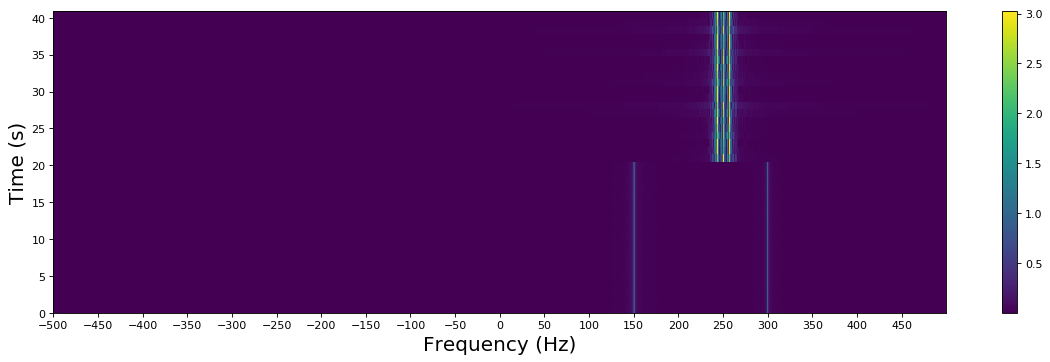

In [33]:
# For repmat and other matrix functions
import numpy.matlib

t_2 = np.arange(0,20.48,t_step);
# Creating a long complex sinusoid with 2 different frequencies
x_4_1 = np.exp(2j*np.pi*(f_c+50)*t_2) + 1*np.exp(2j*np.pi*(f_c-100)*t_2)
# Modulated AM message
am_s_1 = np.zeros((599,1));
# The below command creates white gaussian noise, and then filters it
# thus creating a band-limited signal
# Reader is urged to look up: 
# 1. scipy.signal.hann : raised cosine window
# 2. numpy.random.normal : samples from a normal distribution
am_s_1[:,0] = np.convolve(signal.hann(100),np.random.normal(0,1,500))
# Repeating signal many times to get a long record
am_s_1 = np.matlib.repmat(am_s_1,104,1)
# Truncating to size of t_2
am_s_1 = am_s_1[0:len(t_2),0]
# Creating a long AM signal by using a large time vector
x_4_2 = am_s_1*np.exp(2j*np.pi*(f_c)*t_2);
# Concatenating both long signals to get a longer signal
x_4 = np.concatenate((x_4_1,x_4_2))

# STFT block size
n_fft = 1024
# Taking smaller blocks of 1024 samples each for STFT
x_4_bl = np.reshape(x_4,(-1,n_fft))

# Taking FFTs of each of the block
X_4_bl = np.fft.fftshift(np.fft.fft(x_4_bl))/n_fft; 

# Some useful notifications printed
print("Sampling Frequency is",f_s,"Hz")
print("STFT block length n_fft is",n_fft)

# Plotting STFT as an image
fig = plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
# Extent defines the x and y limits of the image
im = plt.imshow(abs(X_4_bl),aspect='auto', extent=[-500, 500, 0, 40.96])
# Showing the color to value relation (colorbar)
fig.colorbar(im)
# Setting frequency ticks
plt.xticks(np.arange(-500,500,50))
# Setting x and y axes labels
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (s)')
# Setting label fontsize
plt.rc('axes', labelsize=18)
plt.show()

There are few points to note in the above example:
1. An STFT is commonly visualised as a 2D image. In the example, the x-axis represents frequency while the y-axis represents time. The color corresponds to the magnitude of the frequency component at a particular time instant.
2. Localised changes in frequency content and behaviour can be obtained using the STFT. The frequency content of the signal in the previous example abruptly changes around 0.1 s. This is clearly visible in the figure.
3. We put together two signals: one with two complex sinusoids and one bandlimited AM signal. The two complex sinusouids exist till time 0.1 s (at 150 Hz and 300 Hz). After 0.1 s, the bandlimited AM signal is visible, the carrier frequency is 250 Hz.


Alternatively, the scipy library has an in built version of the short term fourier transform with a lot of configurability:

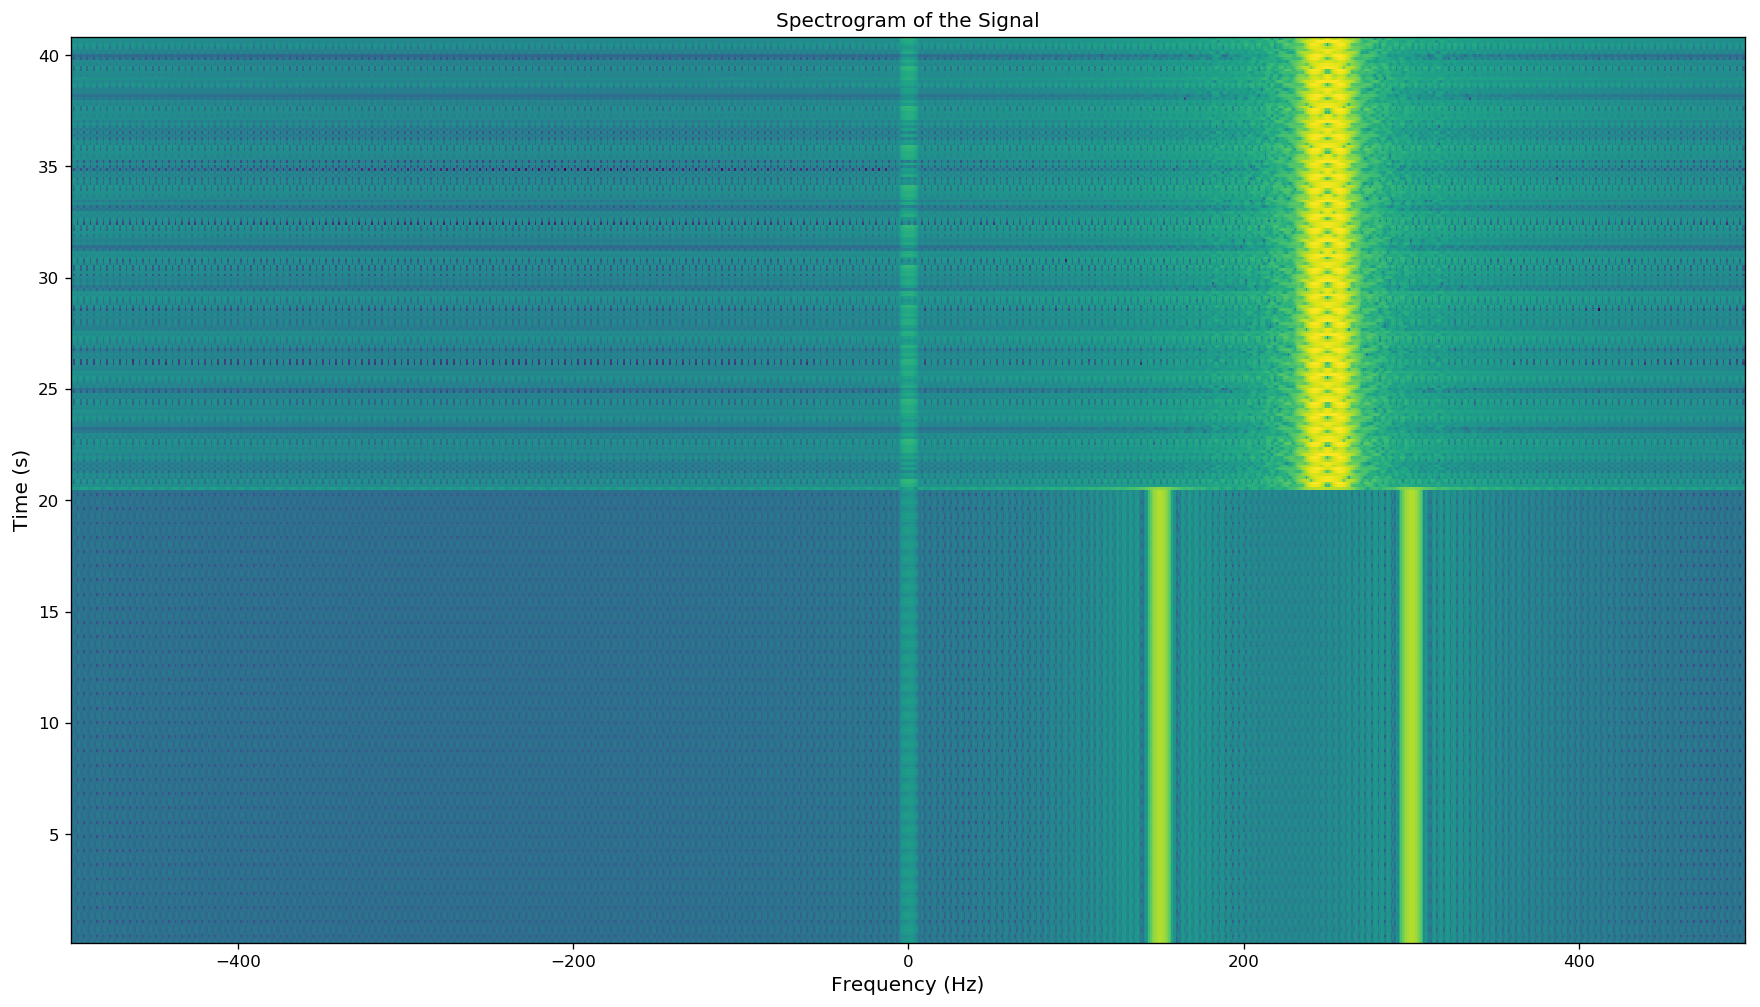

In [34]:
f, t, Sxx = signal.spectrogram(x_4,f_s,window=('hamming'),nperseg=256,noverlap=128,nfft=1024,mode='psd')

# nperseg - Number of samples per segment of window
# noverlap - Number of overlab samples between two consecutive windows
# nfft - FFT size
# window - window type

# Setting figure dimensions
fig = plt.figure(figsize=(18, 10), dpi= 120, facecolor='w', edgecolor='k')
# Plotting the spectrogram in dB scale
plt.pcolormesh(np.fft.fftshift(f),t,10*np.log10(np.transpose(np.fft.fftshift(Sxx[:,:], axes=0))))
plt.xlabel('Frequency (Hz)',fontsize='large');
plt.ylabel('Time (s)',fontsize='large');
plt.title('Spectrogram of the Signal',fontsize='large');

## Real Life Examples

### FM Spectrum in Chennai

 <img src="FM_Photo_ed.png" /> 

The above image shows the instantaneous ESD and also a STFT plot across 1.8 MHz of spectrum centered at 92.7 MHz. Three FM stations are visible in the image. The first station from left is "Fever 91.9 FM" and operates on 91.9 MHz, the second radio station is "Big FM" operating on 92.7 MHz and the third one is "Suryan FM" at 93.5 MHz. The audio information is encoded in the frequency of the carrier wave. The energy that each radio station outputs is localised to a band of frequencies around the frequency that they've been alocated. Each FM station occupies a bandwidth of close to 200 KHz. The noise floor has been marked in the ESD plot as well.

### 2.4 GHz ISM Band in Godavari Hostel

 #### Full Spectrogram
 A software defined radio (USRP B210) was used to capture IQ samples with center frequency 2.412 GHz and sampling rate 25 MSps. 5 million samples were captured and a 1024 STFT with overlap of 64 points was performed. The below spectrogram was obtained as a result. Note that there are three distinctive transmissions in this spectrogram. In the upcoming sections, we'll move closer and observe these transmissions.
 <img src="ISM_stft_small.svg" /> 
 
 #### 1. WiFi
 Zooming into the spectrogram at time 2.9 ms, we observe a signal centered around 2.412 GHz (and hence baseband center is at 0). This signal approximately has 20 MHz bandwidth. This is a WiFi packet that was captured over the air. The device that transmitted this packet is operating on channel 1. One can even see the STS and LTS (2.7 ms) at the start of the packet.
<img src="wifi_stft_small.png" /> 
 
 #### 2. Bluetooth
 Zooming into the spectrogram at time 1.45 ms, we observe a signal centered approximately at 2.1 GHz. This signal has much lower bandwidth compared to a WiFi transmission. This is a Bluetooth packet (from the author's bluetooth audio connection) that was captured over the air. Bluetooth uses Gaussian Frequency Shift Keying (GFSK) modulation. That is, the frequency of the signal is varied slightly between two fixed values to convey bits. The spectrogram even shows this variation.
<img src="bt_stft_small.png" /> 

## Exercises

### E.1 Using Python to Evaluate Spectrogram
The following code snippet loads a file into the Python workspace. It is known that this file contains baseband IQ samples of a signal sampled at 25 MSps at a center frequency of 2.412 GHz. 

Plot the STFT of the signal with each block having 1024 points. Do the following:

1. Identify at least three different transmissions in the STFT and mark their center frequency and bandwidth
2. Identify WiFi and Bluetooth transmissions

In [4]:
# TODO: E.1 Code Snippet

### E.2 Detecting Collissions
The following code snippet loads a file into the Python workspace. It is known that this file contains baseband IQ samples of a signal sampled at 25 MSps at a center frequency of 2.412 GHz. 

The receiver was supposed to receive a packet at 1 ms. It received the packet, but the data that it decoded did not pass the redundancy check (i.e data decoded was wrong). Why do you think this is the case? 

In [5]:
# TODO: E.2 Code Snippet

### E.3 Relative Powers
Looking at the below spectrogram, can you make any comment about the relative strengths of the two signals highlighted? It is known that EM waves attenuate as they propagate outwards in free space. If that is the case, can you make any conclusions regarding the closeness of different transmitters to our receiver?
<img src="rel_pow_stft_edit.svg" /> 